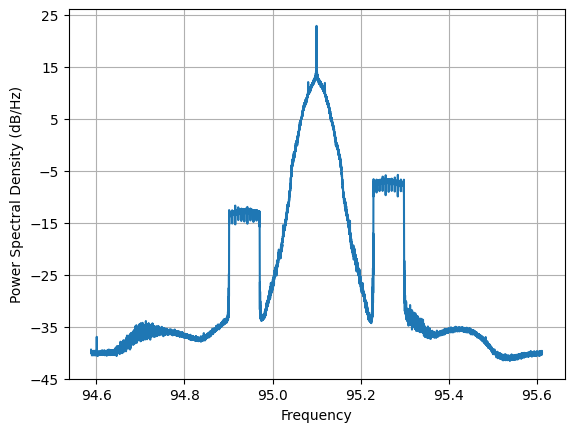

In [1]:
# paramètres globaux
RATE = 1024000
FREQ = 95100000
duréeEnregistrement=10
# importer la librairie du module SDR
from rtlsdr import RtlSdr
import wavio
import numpy as np
from scipy.signal import butter, filtfilt

temps=np.linspace(0,10,10*RATE)

# créer un objet connecté au module SDR
sdr = RtlSdr()
sdr.sample_rate = RATE
sdr.center_freq = FREQ
sdr.gain = 'auto'
# enregistrer des échantillons I/Q en nombres complexes
samples = sdr.read_samples(RATE*duréeEnregistrement)
sdr.close()
# graphique de la densité spectrale de puissance
import matplotlib.pyplot as plt
# psd = Power Spectral Density
plt.psd(samples, NFFT=2 ** 14, Fs=RATE / 1e6, Fc=FREQ / 1e6)
plt.show()




Enregistrement

In [2]:
reel = np.real(samples)
imaginaire = np.imag(samples)

phase=np.arctan(imaginaire/reel)
signalAudio=np.gradient(phase,temps)


wavio.write('test.wav',signalAudio,RATE,sampwidth=2)


C:\Users\laure\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000305180437934, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


Filtre

C:\Users\laure\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\laure\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


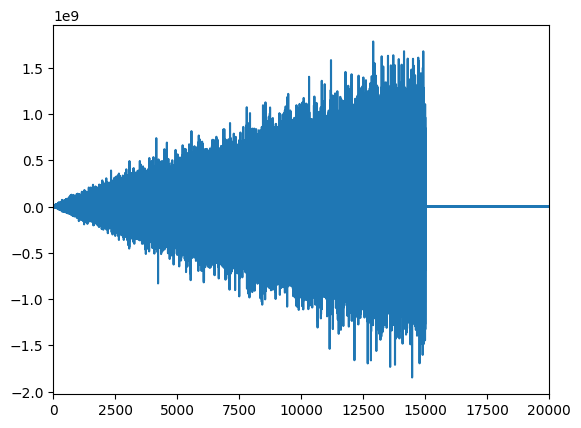

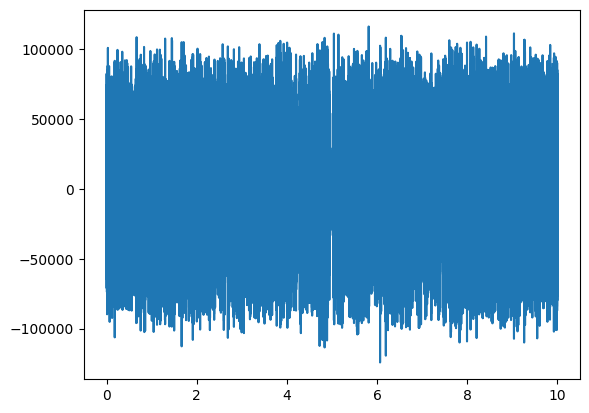

In [3]:
import scipy as sp
from scipy.signal import butter, filtfilt
signalAudioFFT=sp.fft.fft(signalAudio)
fréquences=sp.fft.fftfreq(len(temps),temps[1])

passehaut=np.abs(fréquences)>30
passebas=np.abs(fréquences)<15000


AudioFFTfiltré=signalAudioFFT*passebas*passehaut
signalTraité=sp.fft.ifft(AudioFFTfiltré)


fig,ax=plt.subplots()
ax.plot(fréquences,AudioFFTfiltré)
ax.set_xlim(0,20000)
plt.show

fig,ax=plt.subplots()
ax.plot(temps,signalTraité)
plt.show

wavio.write('testfiltre.wav',signalTraité.real,RATE,sampwidth=2)


Filtre

Enregistrement filtre